In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

## Introduction to convnets

In [14]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [15]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 128)         7385

In [5]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(train_images, train_labels, epochs=5, batch_size=64)

2022-05-03 09:12:18.037694: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-03 09:12:18.225929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/5
938/938 [==============================] - 9s 8ms/step - loss: 0.1547 - accuracy: 0.9527
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0444 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0311 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0240 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0182 - accuracy: 0.9941


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuraccy: {test_acc:.3f}")

 25/313 [=>............................] - ETA: 1s - loss: 0.0366 - accuracy: 0.9850

2022-05-03 09:13:08.847308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.0310 - accuracy: 0.9906
Test accuraccy: 0.991


In [16]:
# Convnet missing it's max-pooling layers
inputs = keras.Input(shape=(28, 28 ,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
model_no_max_pool.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 flatten_5 (Flatten)         (None, 61952)             0         
                                                                 
 dense_5 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## Training a Convnet from scratch

In [24]:
# Preparing the dataset and making it small
import os, shutil, pathlib

original_dir = pathlib.Path("data/cats_vs_dogs/train")
new_base_dir = pathlib.Path("data/cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [
            f"{category}.{i}.jpg" for i in range(start_index, end_index)
        ]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [25]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [26]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [27]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [28]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir/"train",
    image_size=(180, 180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir/"validation",
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir/"test",
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [29]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape (32,)


In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convenet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30


2022-05-03 11:34:24.548296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.7790 - accuracy: 0.5115

2022-05-03 11:34:28.155349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 5s 51ms/step - loss: 0.7790 - accuracy: 0.5115 - val_loss: 0.6911 - val_accuracy: 0.5220
Epoch 2/30
63/63 [==============================] - 3s 44ms/step - loss: 0.6983 - accuracy: 0.5270 - val_loss: 0.6876 - val_accuracy: 0.5570
Epoch 3/30
63/63 [==============================] - 3s 46ms/step - loss: 0.6934 - accuracy: 0.6005 - val_loss: 0.6366 - val_accuracy: 0.6530
Epoch 4/30
63/63 [==============================] - 3s 44ms/step - loss: 0.6343 - accuracy: 0.6600 - val_loss: 0.6179 - val_accuracy: 0.6620
Epoch 5/30
63/63 [==============================] - 3s 44ms/step - loss: 0.5777 - accuracy: 0.6975 - val_loss: 0.6119 - val_accuracy: 0.6550
Epoch 6/30
63/63 [==============================] - 3s 46ms/step - loss: 0.5579 - accuracy: 0.7185 - val_loss: 0.5778 - val_accuracy: 0.7050
Epoch 7/30
63/63 [==============================] - 3s 45ms/step - loss: 0.5225 - accuracy: 0.7415 - val_loss: 0.5975 - val_accuracy: 0.7180
Epoch 8/30
63/63 [======

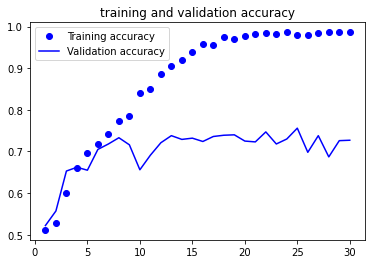

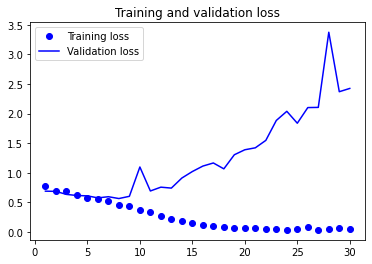

<Figure size 432x288 with 0 Axes>

In [32]:
accuracy = history.history["accuracy"]
val_accuraccy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuraccy, "b", label="Validation accuracy")
plt.title("training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.figure()
plt.show()

In [34]:
test_model = keras.models.load_model("convenet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc: .3f}")

 1/63 [..............................] - ETA: 12s - loss: 0.6918 - accuracy: 0.5938

2022-05-03 11:54:12.749431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 14ms/step - loss: 0.5849 - accuracy: 0.7290
Test accuracy:  0.729


In [56]:
# with tf.device('/cpu:0'):
model = tf.keras.Sequential(
    [
        # tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2)
    ]
)
data_augmentation = model

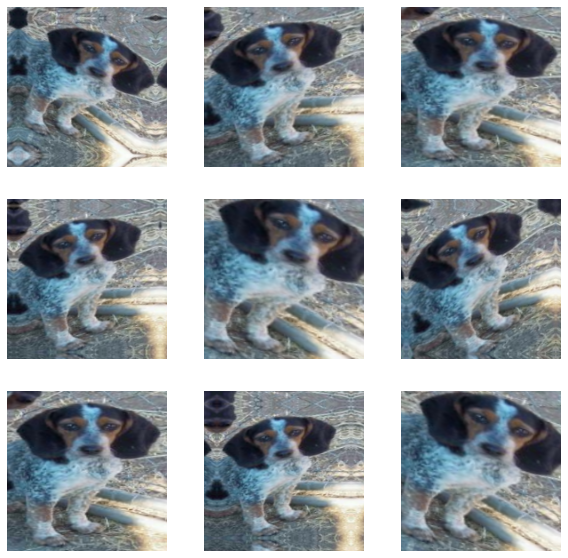

In [57]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):        
        with tf.device('/cpu:0'):
            augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [58]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [59]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100


2022-05-03 14:12:20.525954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.7527 - accuracy: 0.5035

2022-05-03 14:12:24.584454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 5s 62ms/step - loss: 0.7527 - accuracy: 0.5035 - val_loss: 0.6918 - val_accuracy: 0.5010
Epoch 2/100
63/63 [==============================] - 4s 60ms/step - loss: 0.7008 - accuracy: 0.5070 - val_loss: 0.6896 - val_accuracy: 0.5200
Epoch 3/100
63/63 [==============================] - 4s 62ms/step - loss: 0.6953 - accuracy: 0.5380 - val_loss: 0.6692 - val_accuracy: 0.6520
Epoch 4/100
63/63 [==============================] - 4s 62ms/step - loss: 0.6793 - accuracy: 0.6030 - val_loss: 0.6489 - val_accuracy: 0.6640
Epoch 5/100
63/63 [==============================] - 4s 62ms/step - loss: 0.6542 - accuracy: 0.6285 - val_loss: 0.6688 - val_accuracy: 0.5680
Epoch 6/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6314 - accuracy: 0.6580 - val_loss: 0.6143 - val_accuracy: 0.6310
Epoch 7/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6014 - accuracy: 0.6765 - val_loss: 0.5893 - val_accuracy: 0.6920
Epoch 8/100
63/63 

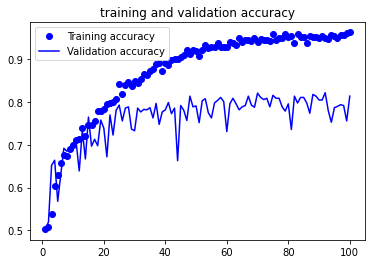

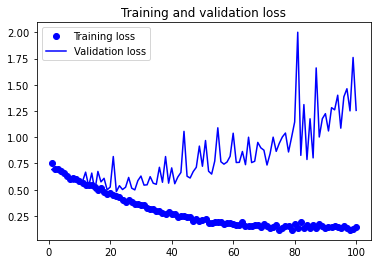

<Figure size 432x288 with 0 Axes>

In [60]:
accuracy = history.history["accuracy"]
val_accuraccy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuraccy, "b", label="Validation accuracy")
plt.title("training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.figure()
plt.show()

In [61]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

 1/63 [..............................] - ETA: 12s - loss: 0.3296 - accuracy: 0.8438

2022-05-03 14:23:55.028681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 16ms/step - loss: 0.4823 - accuracy: 0.7720
Test accuracy: 0.772


In [62]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

58900480/58889256 [==============================] - 3s 0us/step


In [63]:
conv_base.summary();

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [64]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

2022-05-03 17:11:20.496690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-05-03 17:11:26.885145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [65]:
train_features.shape

(2000, 5, 5, 512)

In [66]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

callbacks=[
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20


2022-05-03 17:25:54.103355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 18.5254 - accuracy: 0.9155

2022-05-03 17:25:54.893570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 13ms/step - loss: 18.5254 - accuracy: 0.9155 - val_loss: 5.1665 - val_accuracy: 0.9680
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 3.9916 - accuracy: 0.9720 - val_loss: 4.1139 - val_accuracy: 0.9690
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 2.3116 - accuracy: 0.9835 - val_loss: 3.8976 - val_accuracy: 0.9710
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.8181 - accuracy: 0.9865 - val_loss: 6.0968 - val_accuracy: 0.9620
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1985 - accuracy: 0.9890 - val_loss: 4.3722 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.6014 - accuracy: 0.9940 - val_loss: 6.1535 - val_accuracy: 0.9720
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.5279 - accuracy: 0.9955 - val_loss: 6.3404 - val_accuracy: 0.9740
Epoch 8/20
63/63 [=======

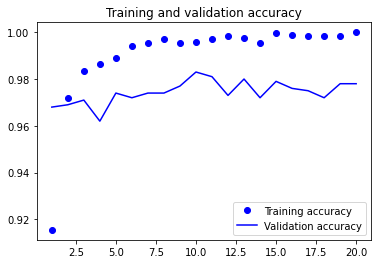

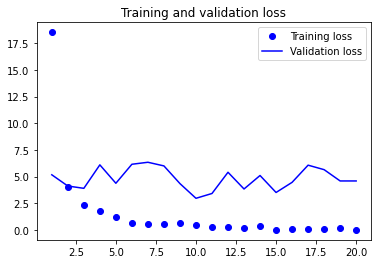

In [67]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [68]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)
conv_base.trainable = False

In [71]:
conv_base.trainable = False
print(conv_base.trainable_weights)

[]


In [81]:
data_augmentation = keras.Sequential(
    [
        # layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
        keras.layers.RandomZoom(0.2)
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [82]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50


InvalidArgumentError: Cannot assign a device for operation model_14/sequential_15/random_rotation_14/stateful_uniform/RngReadAndSkip: Could not satisfy explicit device specification '' because the node {{colocation_node model_14/sequential_15/random_rotation_14/stateful_uniform/RngReadAndSkip}} was colocated with a group of nodes that required incompatible device '/job:localhost/replica:0/task:0/device:GPU:0'. All available devices [/job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:GPU:0]. 
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=2 requested_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' assigned_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' resource_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
RngReadAndSkip: CPU 
_Arg: GPU CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  model_14_sequential_15_random_rotation_14_stateful_uniform_rngreadandskip_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  model_14/sequential_15/random_rotation_14/stateful_uniform/RngReadAndSkip (RngReadAndSkip) 

	 [[{{node model_14/sequential_15/random_rotation_14/stateful_uniform/RngReadAndSkip}}]] [Op:__inference_train_function_116003]